In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings("ignore") #Never display warnings which match
%matplotlib inline

In [ ]:
df = pd.read_csv('bank.csv', delimiter = ';')
df.rename(columns = {'y':'deposit'},inplace = True)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [ ]:
df.shape

(4521, 17)

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [ ]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [ ]:
df.dtypes.value_counts()

object    10
int64      7
Name: count, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  deposit    4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [ ]:
#Handling Duplicate values
df.duplicated().sum()

0

In [ ]:
#Handling Null/Missing values
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [ ]:
cat_cols = df.select_dtypes(include = 'object').columns
print(cat_cols)
num_cols = df.select_dtypes(exclude = 'object').columns
print(num_cols)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')
Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [ ]:
df.describe(include = 'object')

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,yes,no,cellular,may,unknown,no
freq,969,2797,2306,4445,2559,3830,2896,1398,3705,4000


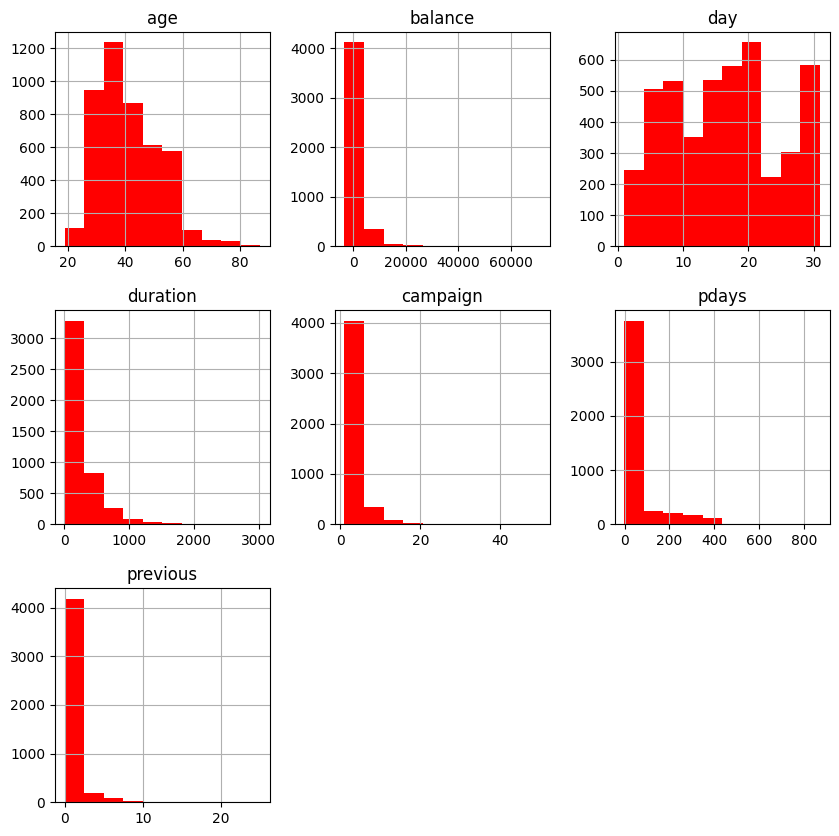

In [ ]:
#Visualizing Numerical Columns using Histplot
df.hist(figsize=(10,10), color = 'red')
plt.show()

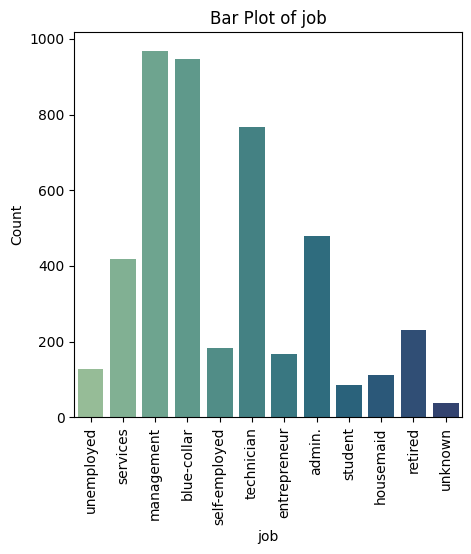

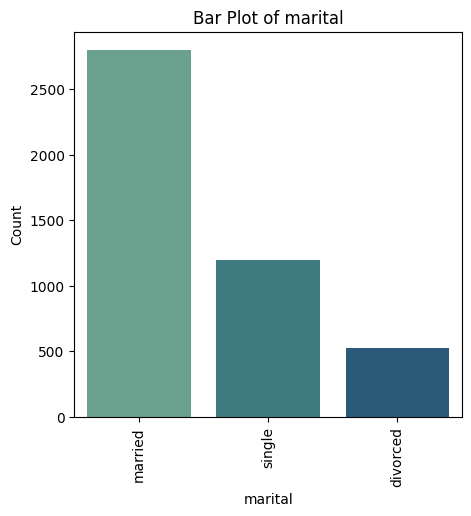

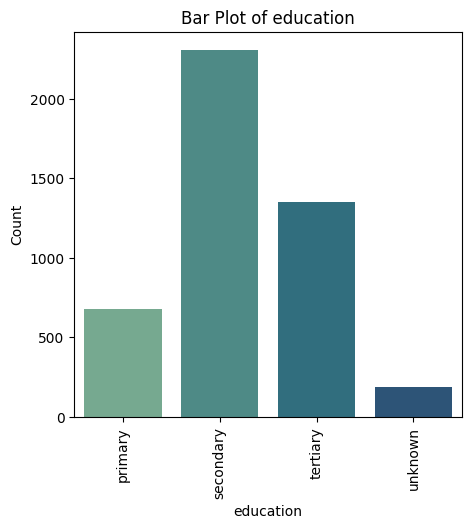

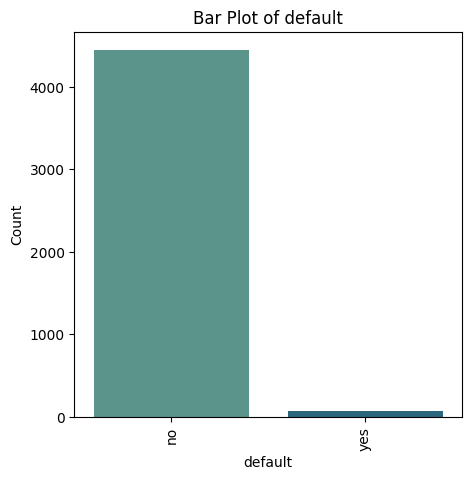

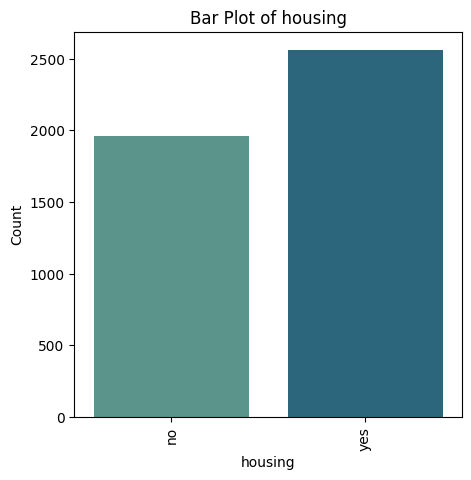

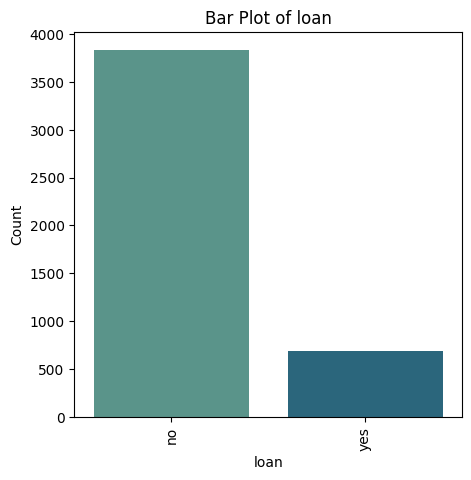

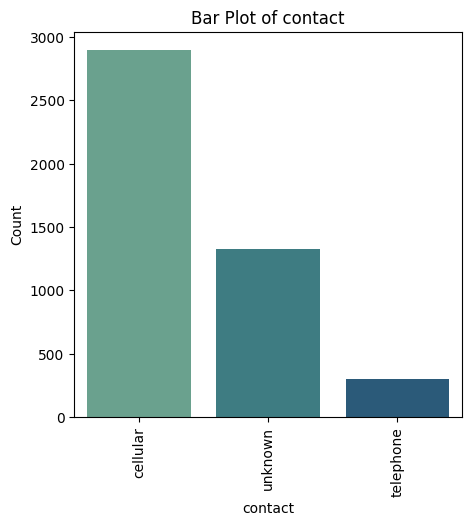

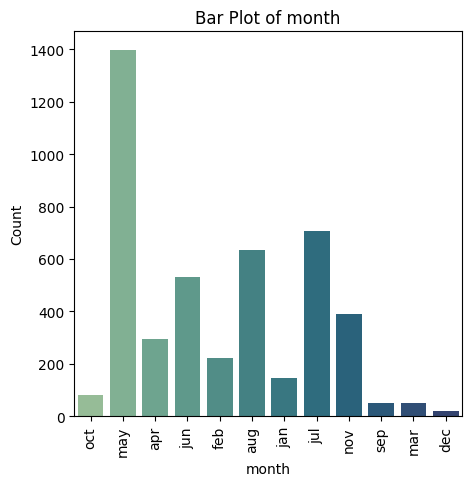

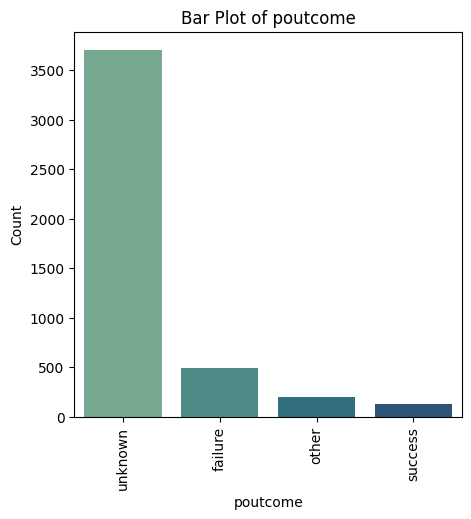

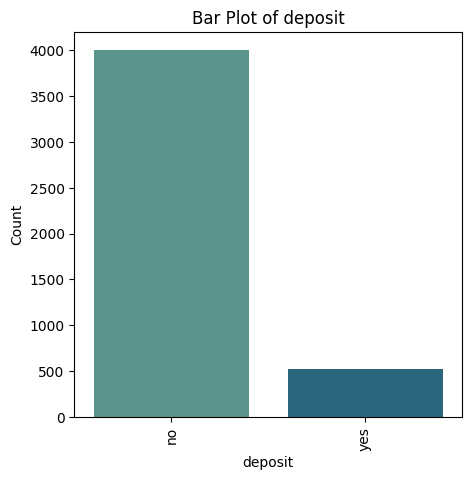

In [ ]:
#Visualizing Categorial Data using Barplot

for feature in cat_cols:
    plt.figure(figsize=(5,5))
    sns.countplot(x = feature, data = df, palette = 'crest')
    plt.title(f'Bar Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation = 90)
    plt.show()

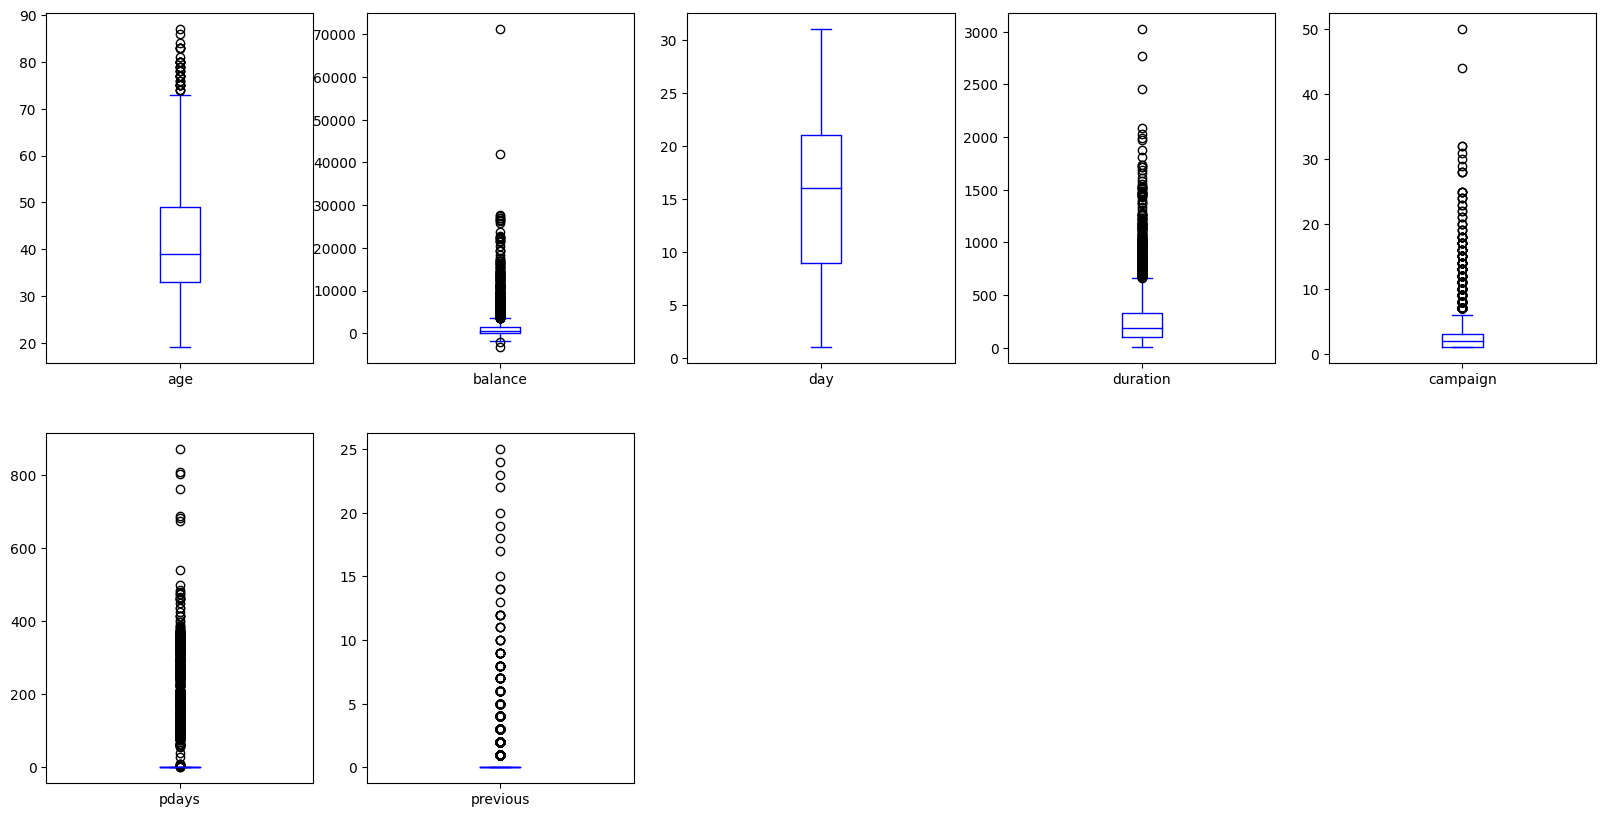

In [ ]:
#Plotting Boxplot and Checking for outliners

df.plot(kind = 'box',subplots = True,layout = (2,5),figsize = (20,10),color = 'blue')
plt.show()

In [ ]:
#Removing Outliers

column = df[['age','campaign','duration']]
q1 = np.quantile(column,0.25)
q3 = np.quantile(column,0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5*iqr)
upper_bound = q3 + (1.5*iqr)
print(iqr,upper_bound,lower_bound)
df[['age','campaign','duration']] = column[(column > lower_bound) & (column < upper_bound)]

101.0 255.5 -148.5


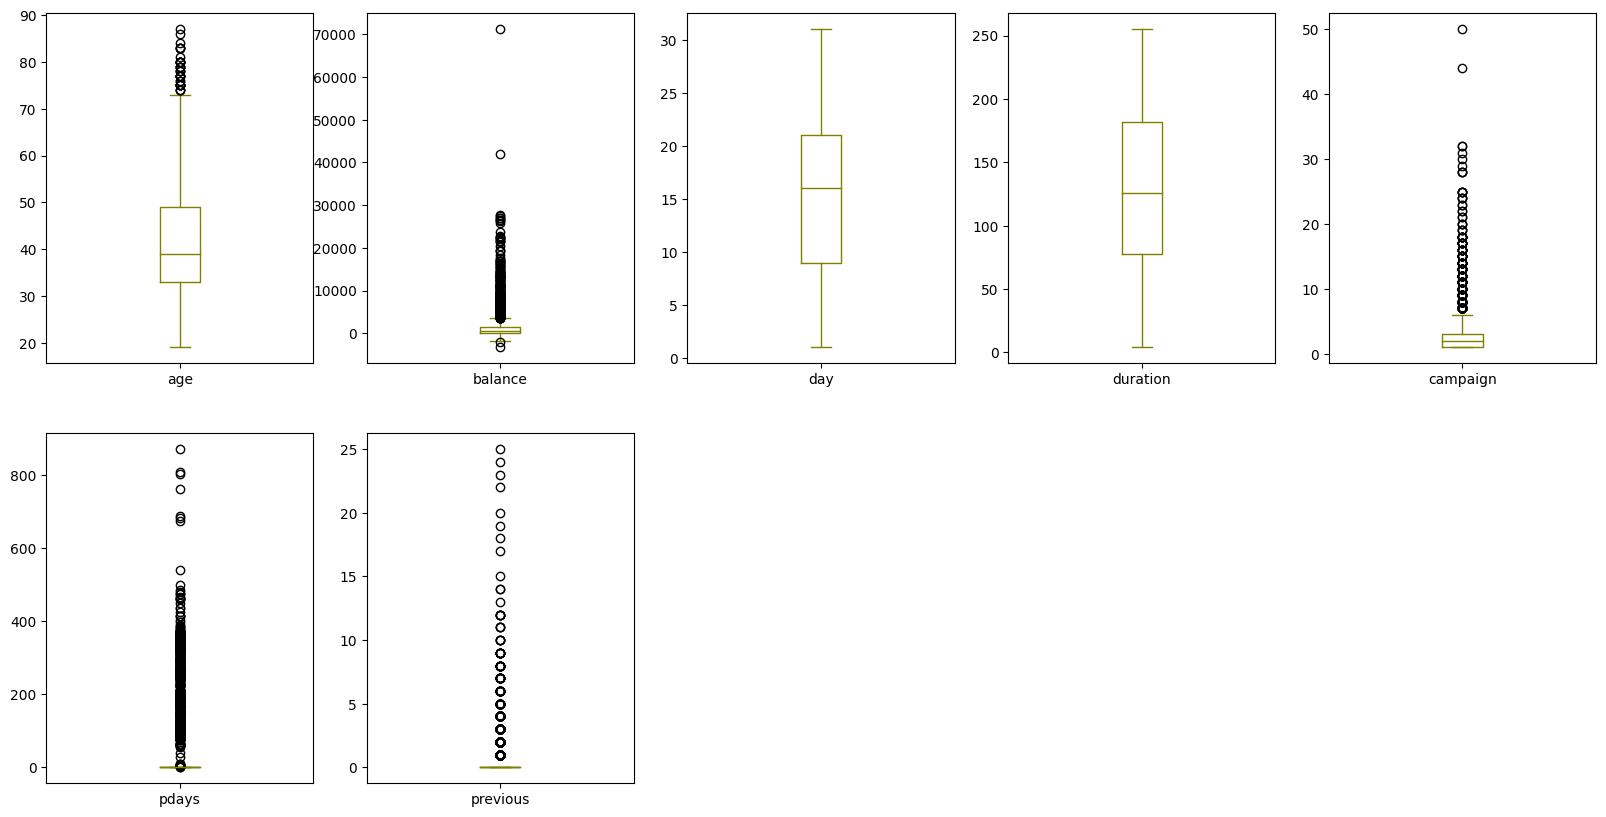

In [ ]:
#Plotting Boxplot after removing outliners

df.plot(kind = 'box',subplots = True,layout = (2,5),figsize = (20,10),color = '#808000')
plt.show()

In [ ]:
#Checking for correlation using Correlation PLot
corr = df.corr()
print(corr)
corr = corr[abs(corr) >= 0.90]
sns.heatmap(corr, annot = True, cmap = 'coolwarm', linewidths = 0.2)
plt.show()

ValueError: could not convert string to float: 'unemployed'

In [ ]:
#Feature selection using Correlation

high_corr_cols = ['emp.var.rate','euribor3m','nr.employed']

In [ ]:
df1 = df.copy()
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [ ]:
df1.drop(high_corr_cols,inplace = True,axis = 1)
df1.columns

KeyError: "['emp.var.rate', 'euribor3m', 'nr.employed'] not found in axis"

In [ ]:
df1.shape

(4521, 17)

In [ ]:
#Coversion of catogorial columns into numerical columns using label encoder
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df_encoded = df1.apply(lb.fit_transform)
df_encoded

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,11,10,1,0,0,1475,0,0,0,18,10,75,0,0,0,3,0
1,14,7,1,1,0,2030,1,1,0,10,8,216,0,228,4,0,0
2,16,4,2,2,0,1303,1,0,0,15,0,181,0,219,1,0,0
3,11,4,1,2,0,1352,1,1,2,2,6,195,3,0,0,3,0
4,40,1,1,1,0,274,1,0,2,4,8,222,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,14,7,1,1,0,119,1,0,0,29,5,252,4,0,0,3,0
4517,38,6,1,2,1,0,1,1,2,8,8,149,0,0,0,3,0
4518,38,9,1,1,0,558,0,0,0,18,1,147,10,0,0,3,0
4519,9,1,1,1,0,1187,0,0,0,5,3,125,3,140,3,1,0


In [ ]:
df_encoded['deposit'].value_counts()

deposit
0    4000
1     521
Name: count, dtype: int64

In [ ]:
df_encoded['deposit'].value_counts()

deposit
0    4000
1     521
Name: count, dtype: int64

In [ ]:
#Selecting Independent and Dependent Variables

x = df_encoded.drop('deposit',axis = 1)
y = df_encoded['deposit']
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(4521, 16)
(4521,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
print(4119*0.25)

1029.75


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25 , random_state = 1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3390, 16)
(1131, 16)
(3390,)
(1131,)


In [ ]:
#Function to compute Confusion Matrix,Classification Report and to generate training and testing scores

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

def eval_model(y_test,y_pred):
    acc = accuracy_score(y_test,y_pred)
    print("\nAccuracy Score : ",acc)
    cm = confusion_matrix(y_test,y_pred)
    print("\nConfusion Matrix : ",cm)
    print("\nClassification report\n",classification_report(y_test,y_pred))

def mscore(model):
    train_score = model.score(x_train,y_train)
    test_score = model.score(x_test,y_test)
    print("\nTraining Score : ",train_score)
    print("\nTesting Score : ",test_score)

In [ ]:
#Importing Decision tree Library
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#Building Decision Tree Classifier Model
dt = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=10)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [ ]:
#Evaluating Training and Testing Accuracy
mscore(dt)


Training Score :  0.9073746312684365

Testing Score :  0.8806366047745358


In [ ]:
#Generating Predictions
ypred_dt = dt.predict(x_test)
print(ypred_dt)

[0 0 0 ... 0 0 0]


In [ ]:
#Evaluate the Model ---- Confusion Matrix , Classification report , Accuracy
eval_model(y_test,ypred_dt)



Accuracy Score :  0.8806366047745358

Confusion Matrix :  [[976  12]
 [123  20]]

Classification report
               precision    recall  f1-score   support

           0       0.89      0.99      0.94       988
           1       0.62      0.14      0.23       143

    accuracy                           0.88      1131
   macro avg       0.76      0.56      0.58      1131
weighted avg       0.85      0.88      0.85      1131



In [ ]:
#Plotting Decision Tree
from sklearn.tree import plot_tree

cn = ['no','yes'] #class names
fn = x_train.columns #feature names
print(cn)
print(fn)

['no', 'yes']
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')


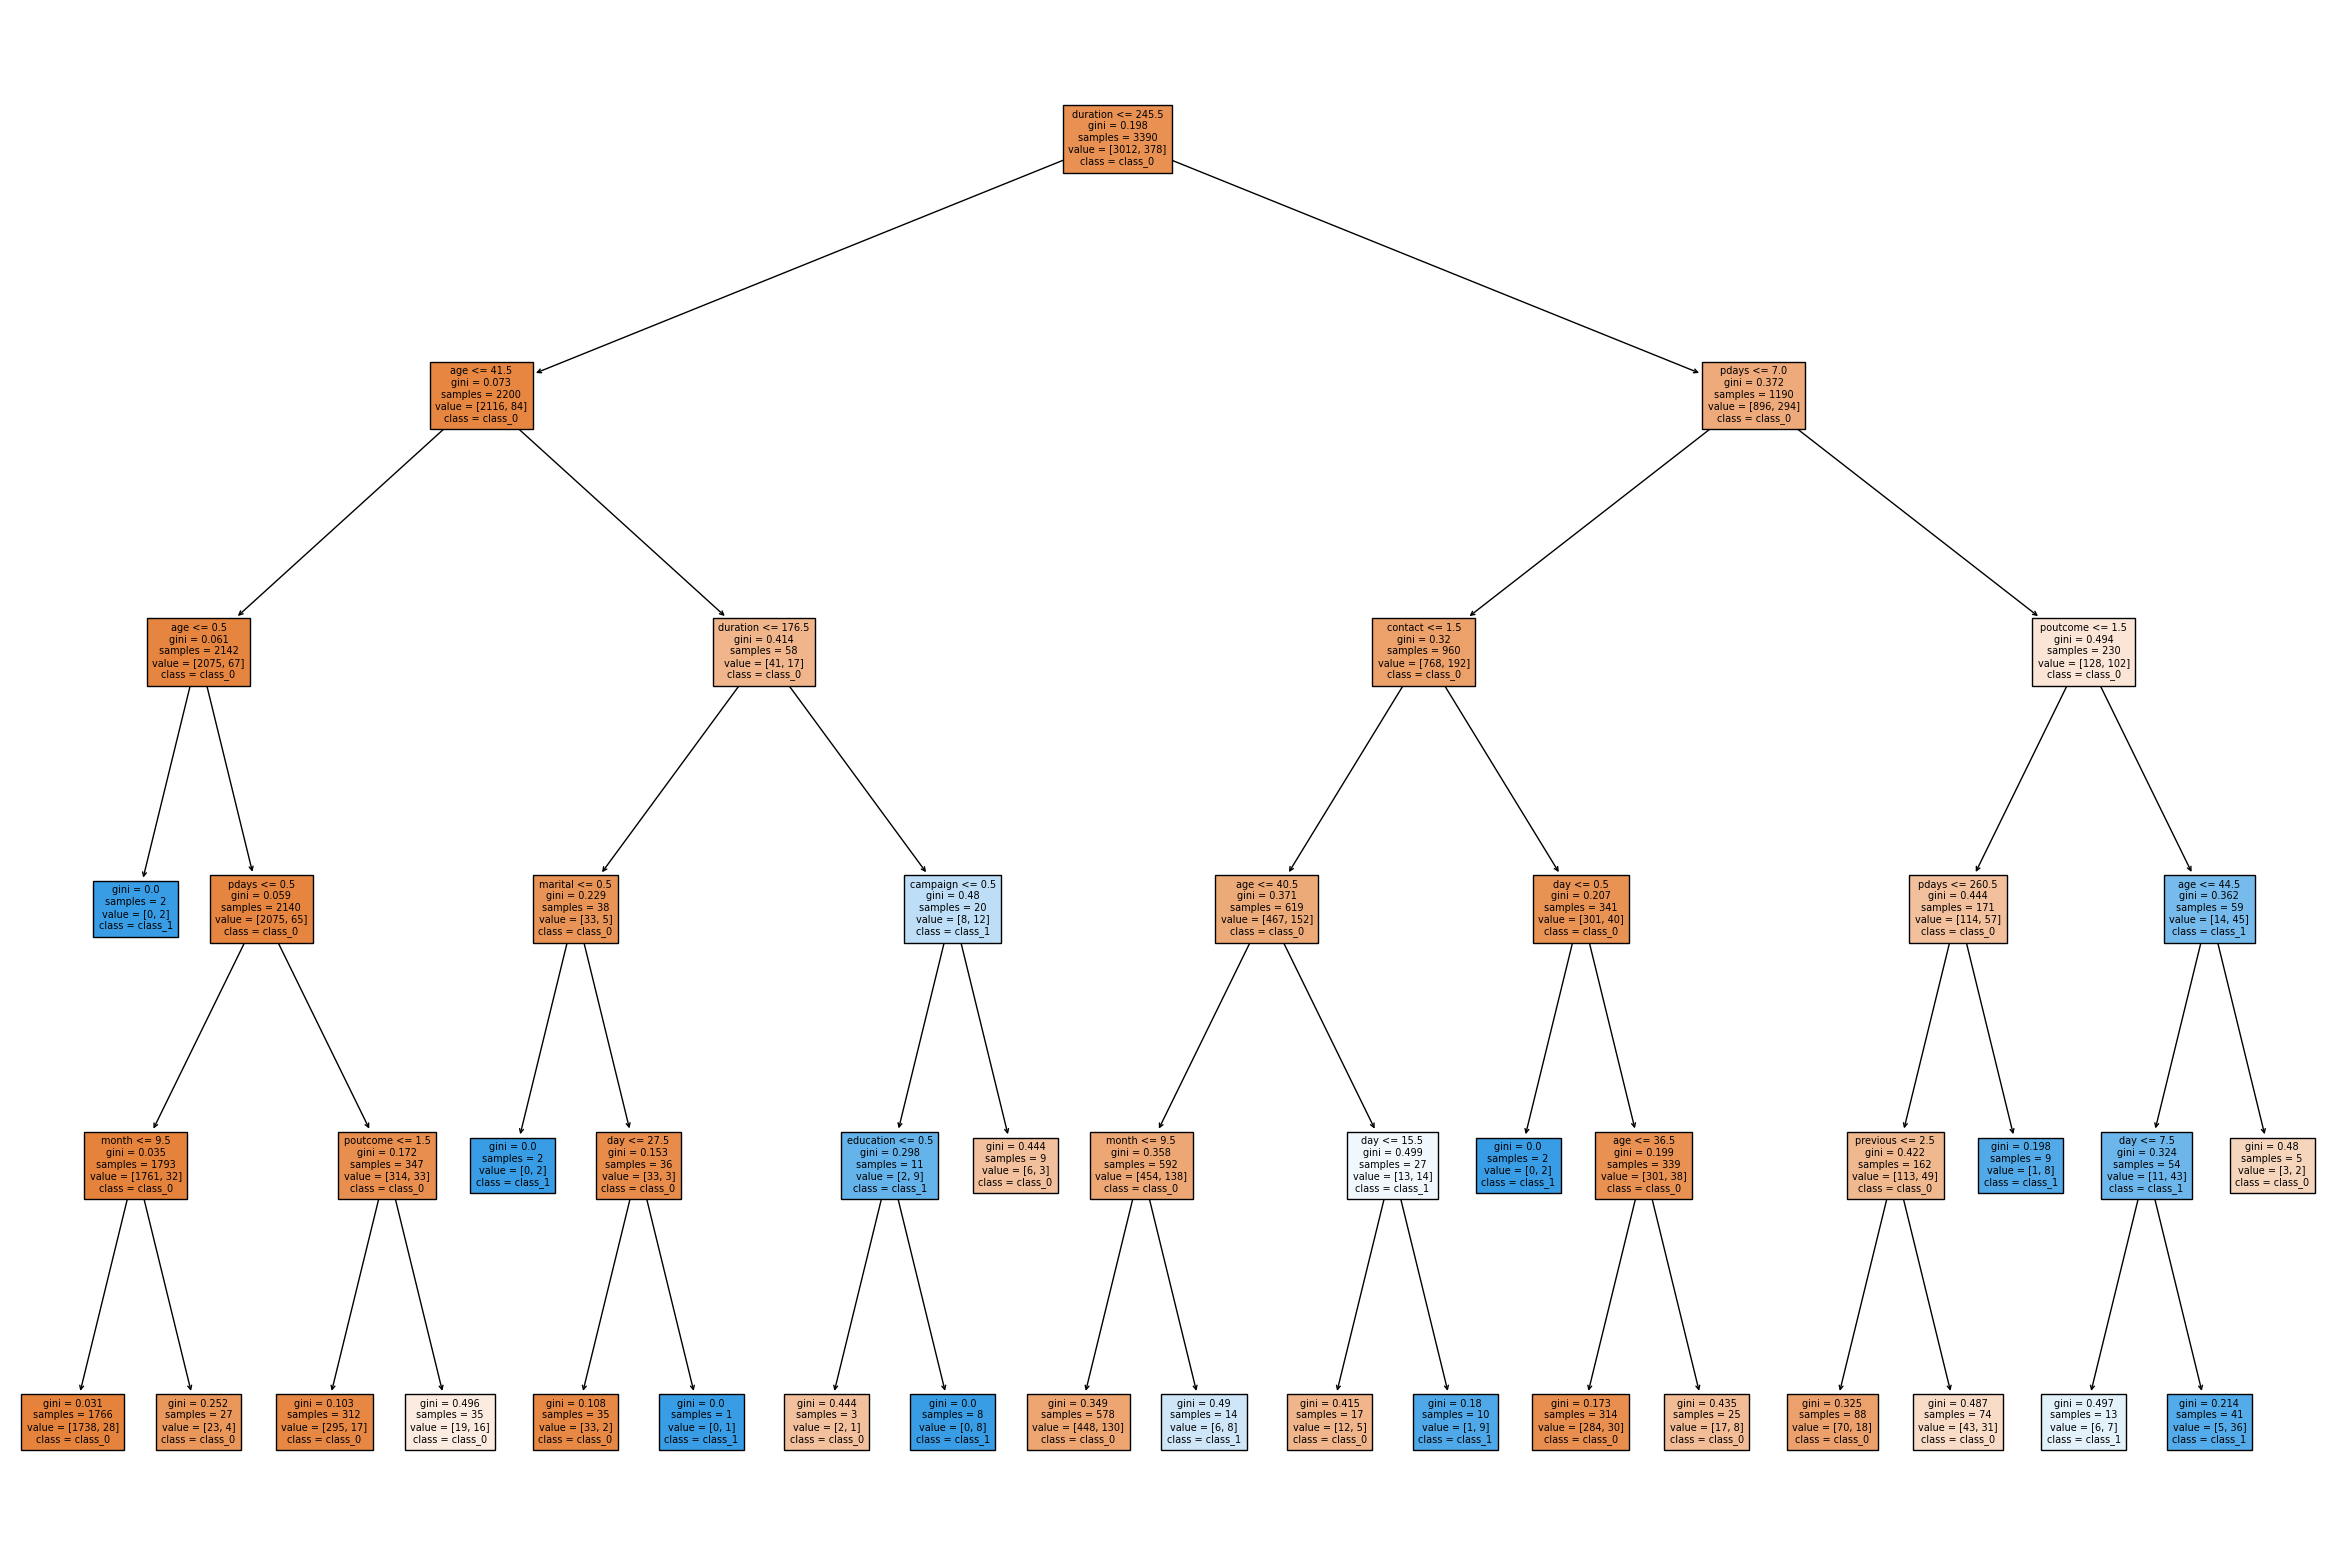

In [ ]:
feature_names = df.columns.tolist()
class_names = ["class_0","class_1"]
plt.figure(figsize = (30,20))
plot_tree(dt,feature_names=feature_names,class_names=class_names,filled = True,fontsize = 7)
plt.show()

In [ ]:
#Building Decision Tree Classifier Model
dt1 = DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_split=15)
dt1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=15)

In [ ]:
#Evaluating Training and Testing Accuracy
mscore(dt1)


Training Score :  0.8991150442477877

Testing Score :  0.8726790450928382


In [ ]:
#Generating Predictions
ypred_dt1 = dt1.predict(x_test)
print(ypred_dt1)

[0 0 0 ... 0 0 0]


In [ ]:
#Evaluate the Model ---- Confusion Matrix , Classification report , Accuracy
eval_model(y_test,ypred_dt1)


Accuracy Score :  0.8726790450928382

Confusion Matrix :  [[969  19]
 [125  18]]

Classification report
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       988
           1       0.49      0.13      0.20       143

    accuracy                           0.87      1131
   macro avg       0.69      0.55      0.57      1131
weighted avg       0.84      0.87      0.84      1131



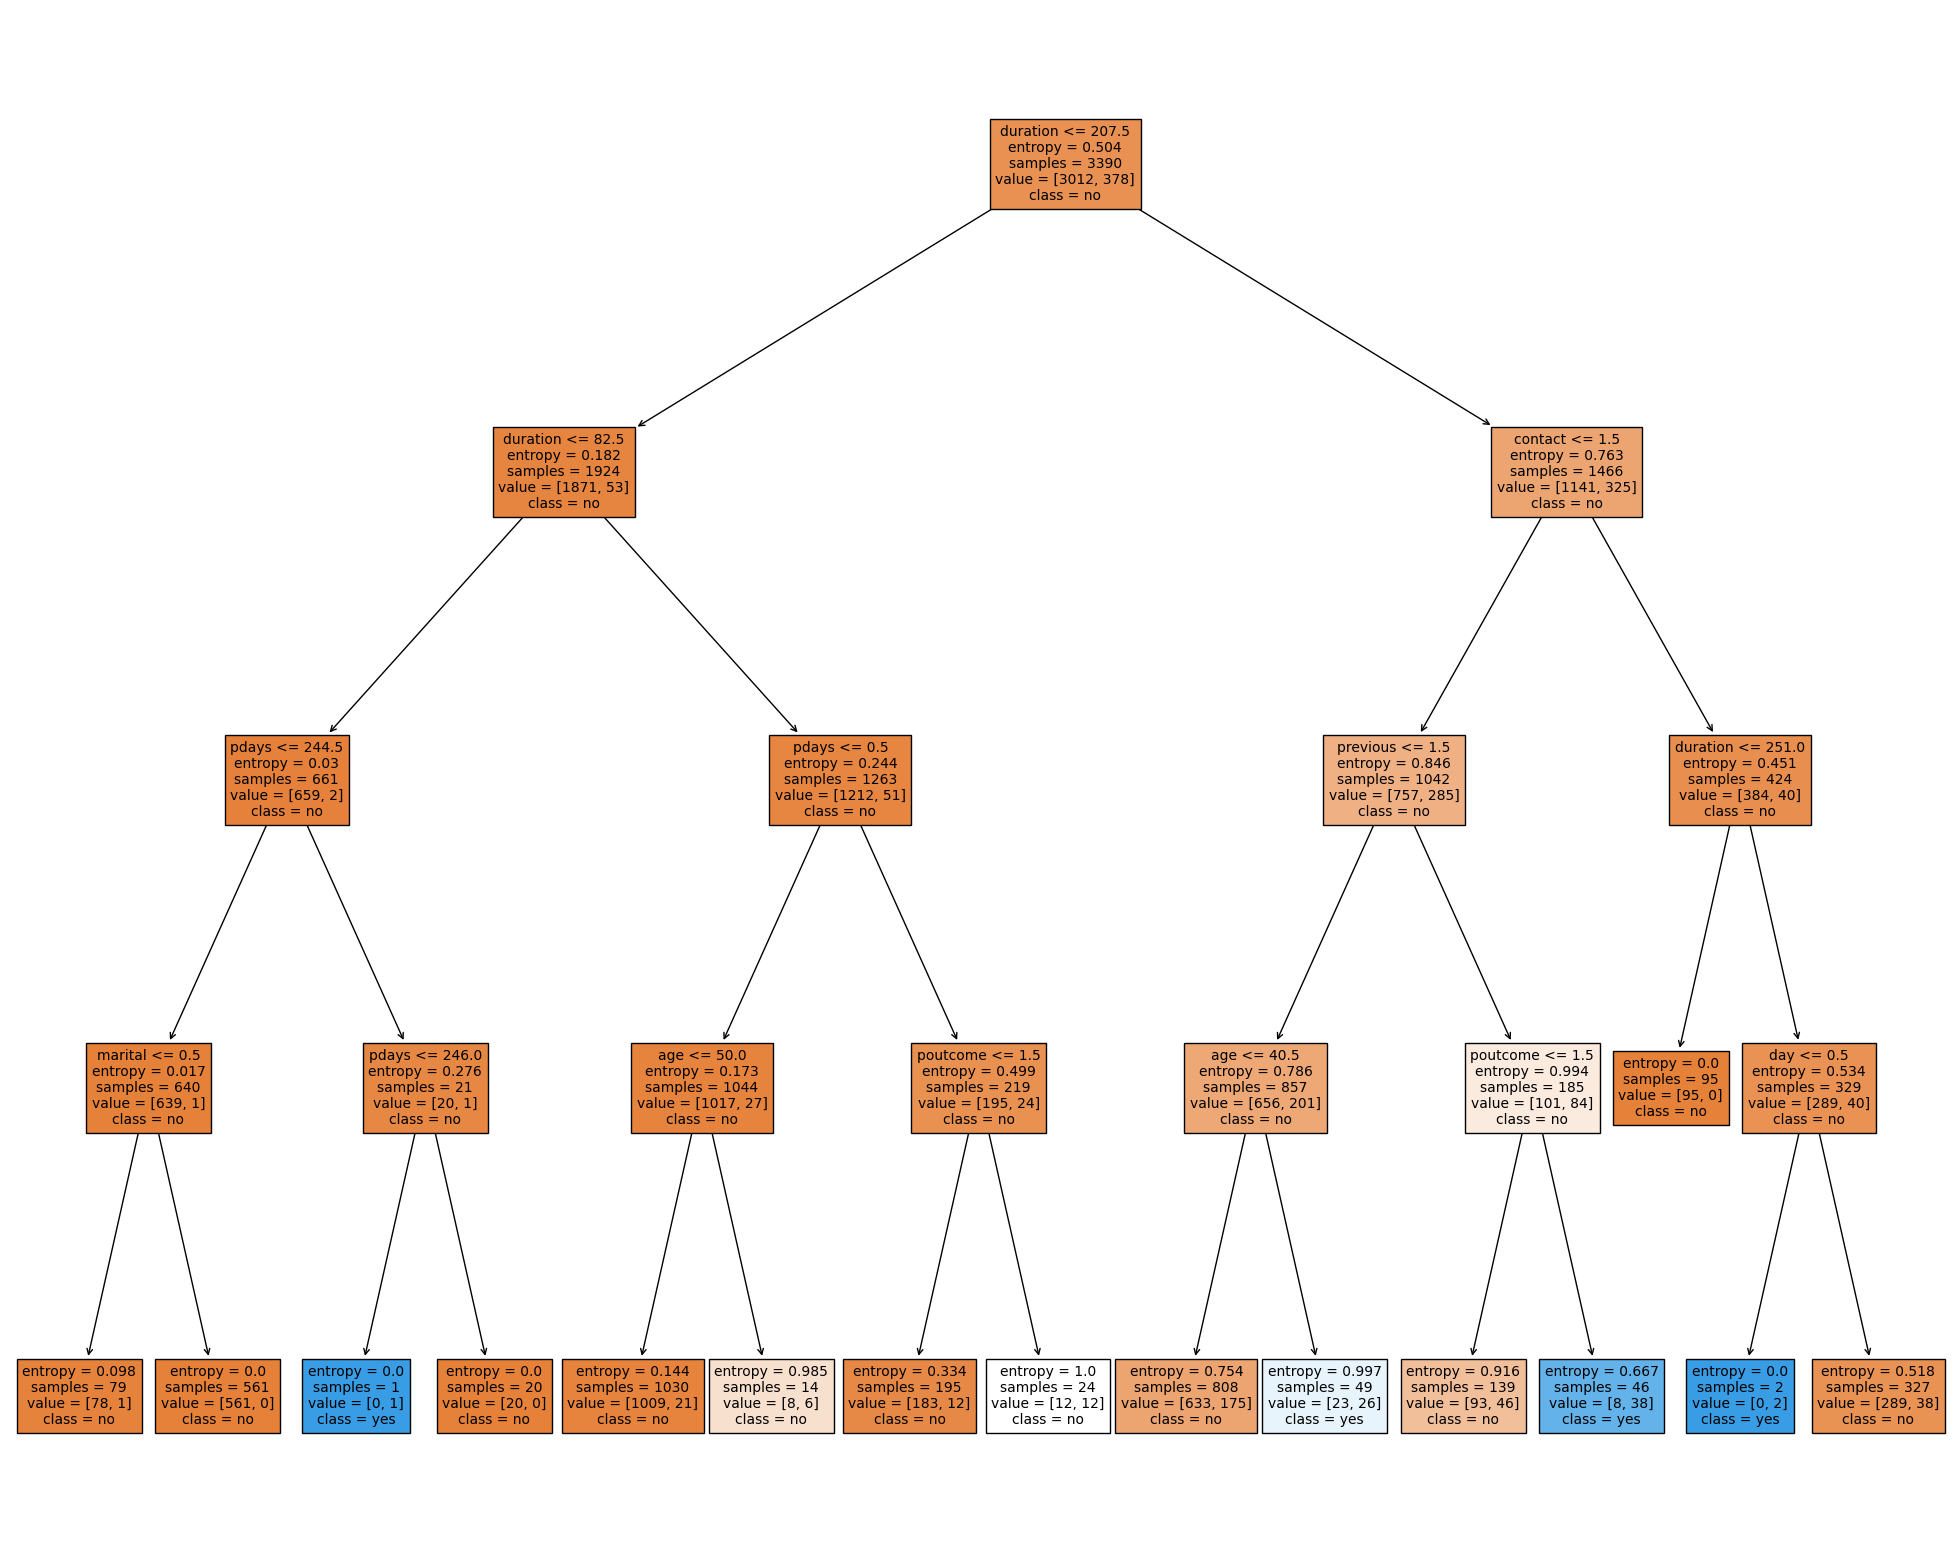

In [ ]:
#Plotting Decision classifier tree
plt.figure(figsize = (25,20))
plot_tree(dt1,feature_names=fn.tolist(),class_names=cn,filled = True,fontsize = 10)
plt.show()